/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[-1.42673272  1.6568229 ]]
[-1.57924612]


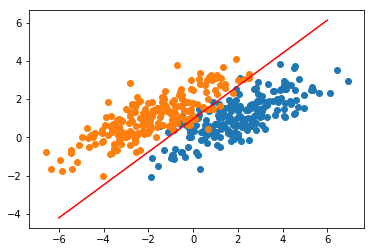

In [52]:
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.linear_model import LogisticRegression;

N = 200;
dim = 2;
MaxIter = 1e10;
epsilon = 1e-5;

mu0 = np.array ([[2],[1]]);
mu1 = np.array ([[-2],[1]]);

# creating data
P = np.array ([[0.5, np.sqrt(3)/2], [-np.sqrt(3)/2, 0.5]]);
D_sqrt = np.array ([[0.64, 0], [0, 2]]);
X0 = P.dot (D_sqrt).dot (np.random.randn (dim,N)) + mu0;
X1 = P.dot (D_sqrt).dot (np.random.randn (dim,N)) + mu1;

plt.scatter (X0[0,:], X0[1,:]);
plt.scatter (X1[0,:], X1[1,:]);


X = np.c_[X0,X1].T;
Y = np.c_[np.zeros((1,N)), np.ones((1,N))].T;

lf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, Y);
beta = lf.coef_;
beta0 = lf.intercept_;
print (lf.coef_);
print (lf.intercept_);


x = np.linspace (-6,6);  
plt.plot (x, - (beta0 + beta[0,0] * x) / beta[0,1], 'r-');

#X = np.r_[np.ones((1,2*N)), np.c_[X0, X1]].T;
#Y = np.c_[np.zeros((1,N)), np.ones((1,N))].T;
#beta = np.ones ((dim+1,1));
#t = 0;
#while t<MaxIter:
#    tmp = np.exp (-beta.T.dot (X.T)).reshape (2*N, 1);
#    p = 1 / (1+tmp);
#    w = p * (np.ones_like (p) - p);
#    W = np.diag (w.reshape (400,));
#    W_inv = np.diag (1 / w.reshape (400,));
#    Z = X.dot (beta) + W_inv.dot (Y-p);
#    beta_new = np.linalg.inv (X.T.dot (W). dot (X)). dot (X.T). dot(W). dot(Z);
#    if (np.abs (beta.T.dot (beta_new)) < epsilon):
#        print (t);
#        print (beta.T.dot (beta_new));
#        break;
#     
#    if t%1000==0:
#        print (t);
#        print (beta.T.dot (beta_new));
#    
#    t += 1;
#    beta = beta_new;
#
#
#
#print (beta);
#x = np.linspace (-6,6);  
#plt.plot (x, - (beta[0,0] + beta[1,0] * x) / beta[2,0]);